In [ ]:
import cv2
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras as keras
from zipfile import ZipFile

In [ ]:
data_dir = '/content/drive/My Drive/datasets/kagglecatsanddogs_3367a.zip'

zip=ZipFile(data_dir)

In [ ]:
# folders, works like s3 storage
# Cat 12502
# Dog 12502

for name in zip.namelist():
  if name.endswith('/'):
    print(name)


PetImages/Cat/
PetImages/Dog/


In [ ]:

for name in zip.namelist()[-5:]:
  if name.startswith('PetImages/Dog/'):
    print(name)

PetImages/Dog/9998.jpg
PetImages/Dog/9999.jpg
PetImages/Dog/Thumbs.db


In [ ]:
c = 0
for name in zip.namelist():
  if (name.startswith('PetImages/Dog/')) & (name.endswith('.jpg')):
    flag = name
    print(c)
    break
  else:
    c += 1
    pass

12503


In [ ]:
flag

'PetImages/Dog/0.jpg'

[[252 252 252 ... 255 255 254]
 [253 253 252 ... 254 254 253]
 [254 254 253 ... 253 252 251]
 ...
 [ 93  90  89 ... 118 122 127]
 [ 90  89  89 ... 114 119 127]
 [ 96  92  86 ... 114 114 113]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


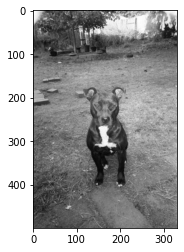

In [ ]:
with ZipFile(data_dir, 'r') as zfile:
    data = zfile.read('PetImages/Dog/9998.jpg')

nparr = np.fromstring(data, np.uint8)

img_np = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE) 

print(img_np)
plt.imshow(img_np, cmap='gray')
plt.show()

In [ ]:
print(img_np.shape)

(500, 331)


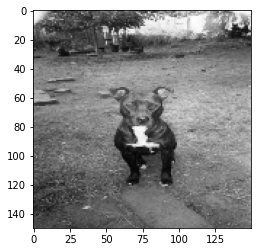

In [ ]:
IMG_SIZE = 150

new_array = cv2.resize(img_np, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
!ls /content/drive/My\ Drive/datasets/

cat_dog_training	     latenight_comments.csv.gz	titanic.zip
kagglecatsanddogs_3367a.zip  new_york_fare


Importing training data from zip file without opening

In [ ]:
category = ['Dog', 'Cat']
sample_numb = 600
training = []

# change sample number
with ZipFile(data_dir, 'r') as zfile:
  for name in category:
    class_num = category.index(name)
    num_ls = random.sample(range(12502), sample_numb)
    for numb in num_ls:
      try:
        data = zfile.read(f'PetImages/{name}/{numb}.jpg')
        nparr = np.fromstring(data, np.uint8)
        img_np = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE) 
        IMG_SIZE = 150
        new_array = cv2.resize(img_np, (IMG_SIZE, IMG_SIZE))

        training.append([new_array, class_num])
      except:
        pass


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


In [ ]:
random.shuffle(training)

In [ ]:
for sample in training[:10]:
  print(sample[1])

0
1
0
0
1
0
0
0
0
1


In [ ]:
X = []
y = []

for feature, label in training:
  X.append(feature)
  y.append(label)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

with open('/content/drive/My Drive/datasets/cat_dog_training/X.pickle', 'wb') as out:
  pickle.dump(X, out)

with open('/content/drive/My Drive/datasets/cat_dog_training/y.pickle', 'wb') as out:
  pickle.dump(y, out)
